<a href="https://colab.research.google.com/github/hoantran14/CNN1/blob/main/faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 33 images belonging to 5 classes.
Found 8 images belonging to 5 classes.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.1818 - loss: 1.7399 - val_accuracy: 0.2500 - val_loss: 1.4833
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5152 - loss: 1.5147 - val_accuracy: 0.2500 - val_loss: 1.4310
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.3264 - loss: 1.6489 - val_accuracy: 0.2500 - val_loss: 1.3556
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1818 - loss: 1.6914 - val_accuracy: 0.2500 - val_loss: 1.3855
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 256ms/step - accuracy: 0.1225 - loss: 1.6908 - val_accuracy: 0.2500 - val_loss: 1.4187
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.2652 - loss: 1.4956 - val_accuracy: 0.3750 - val_loss: 1.4649
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.3674 - loss: 1.4442 - val_accuracy: 0.3750 - val_loss: 1.4550
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.3674 - loss: 1.4454 - val_accuracy: 0.3750 - val_loss: 

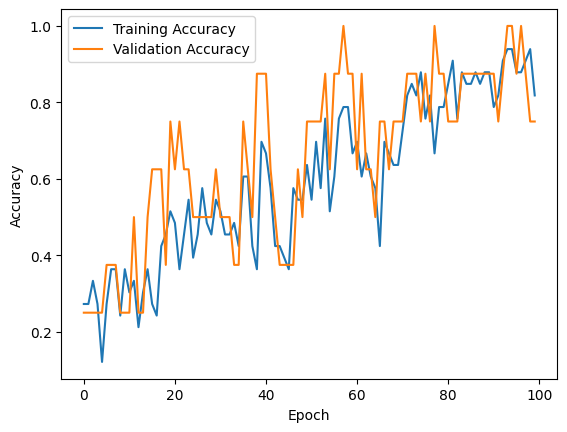

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


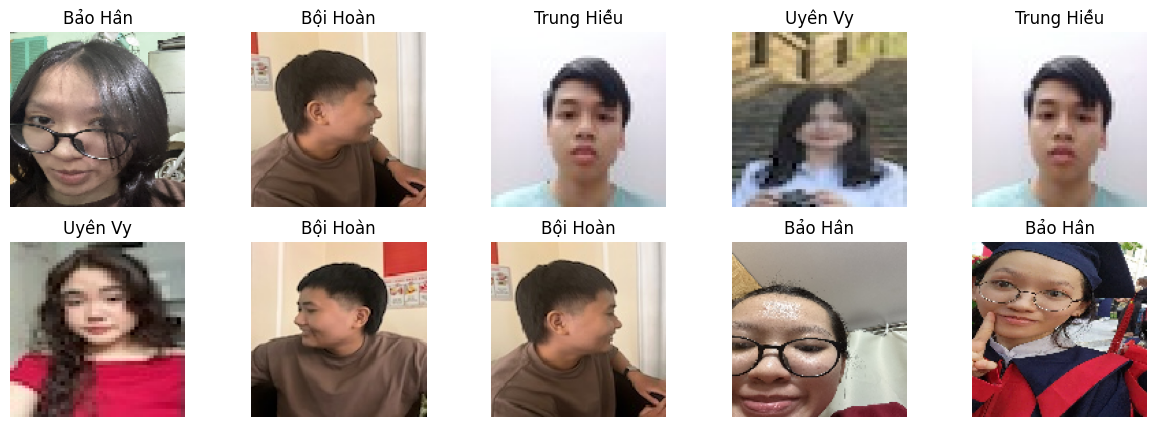

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


train_dir = "/content/drive/MyDrive/Dữ liệu cho AI/Faces"


img_width, img_height = 128, 128
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


image_paths = [
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bảo Hân/han1.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bội Hoàn/Hoàn 6.jpeg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Trung Hiếu/812cf385-f0df-4619-8965-4c93fbf17f6a.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Uyên Vy/vy 10.jpeg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Trung Hiếu/e103d515-473c-4a7e-b5c5-cc1e3cf7d8ce.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Uyên Vy/vy 4.jpeg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bội Hoàn/Hoàn 8.jpeg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bội Hoàn/Hoàn 6.jpeg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bảo Hân/han5.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Faces/Bảo Hân/han9.jpg"
]


processed_images = []
for path in image_paths:
    img = load_img(path, target_size=(img_width, img_height))
    img = img_to_array(img) / 255.0
    processed_images.append(img)


processed_images = np.array(processed_images)


predictions = np.argmax(model.predict(processed_images), axis=-1)

class_labels = {v: k for k, v in train_generator.class_indices.items()}


plt.figure(figsize=(15, 5))
for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(img_width, img_height))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{class_labels[predictions[i]]}")
plt.show()


